# DPA or Differential Side-channel Analysis (DSCA) Tutorial on AES

<img src="images/KeyBits.jpg" width="300px">

In [1]:
import estraces
import numpy as np

### Load traces from BZR

In [2]:
path = '../BZR/traces_BZR_AES/'

In [3]:
# Extract the metadata from ascii files
metadatas = {
    'plaintext' : estraces.bin_extractor.FilePatternExtractor(path+"plaintexts.txt", r"([A-Fa-f0-9]{32})", num=0),
    'ciphertext' : estraces.bin_extractor.FilePatternExtractor(path+"ciphertexts.txt", r"([A-Fa-f0-9]{32})", num=0),
    'key' : estraces.bin_extractor.DirectValue("8f03e77aec66580a132bd23bf5634e0f")
}

ths = estraces.read_ths_from_bin_filenames_pattern(
    path+"*.bin",
    dtype=np.int8,
    metadatas_parsers=metadatas,
    offset = 48
)

In [4]:
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['figure.figsize']=(15,3)

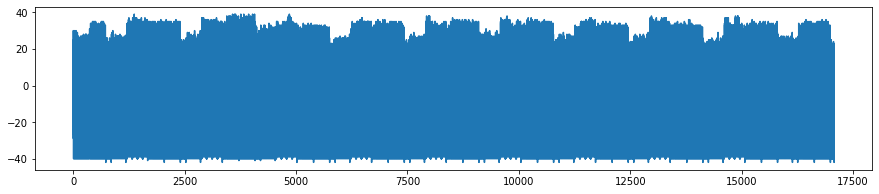

In [15]:
plt.plot(ths[0].samples)
plt.show()

#### Store traces in an ETS file for AES 10 rounds

In [7]:
from estraces import ETSWriter

In [8]:
ths.metadata_tags

['plaintext', 'ciphertext', 'key']

In [9]:
out = ETSWriter('AES_traces_set.ets', overwrite=True)

for i in range(len(ths)): 
    out.write_points(ths[i].samples, index=i)
    out.write_meta(tag='plaintext', metadata=ths[i].plaintext, index=i)
    out.write_meta(tag='ciphertext', metadata=ths[i].ciphertext, index=i)
    out.write_meta(tag='key', metadata=ths[i].key, index=i)
    
#end file
out.close()

#### Store traces in an ETS file for AES first round and operations

In [10]:
out= ETSWriter('AES_traces_set_1st_round.ets', overwrite=True)

for i in range(len(ths)): 
    out.write_points(ths[i].samples[0:3000], index=i)
    out.write_meta(tag='plaintext', metadata=ths[i].plaintext, index=i)
    out.write_meta(tag='ciphertext', metadata=ths[i].ciphertext, index=i)
    out.write_meta(tag='key', metadata=ths[i].key, index=i)
        
#end file
out.close()

#### Observe the traces.



In [11]:
ths_AES_full = estraces.read_ths_from_ets_file('AES_traces_set.ets')
ths_AES_1stround = estraces.read_ths_from_ets_file('AES_traces_set_1st_round.ets')

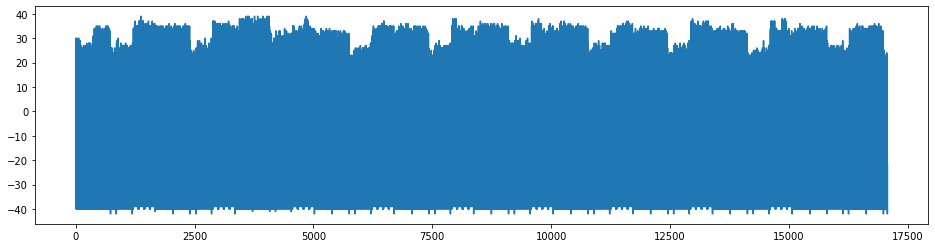

In [12]:
plt.plot(ths_AES_full[0].samples.T)
plt.show()

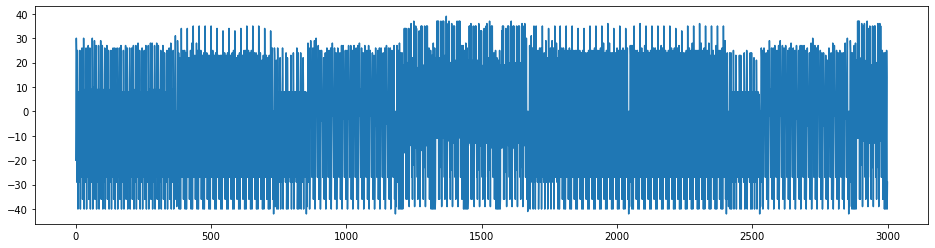

In [13]:
plt.plot(ths_AES_1stround[0].samples.T)
plt.show()